# 1. File I/O

In [5]:
from skimage import io
import skimage
import os

## read image file

In [26]:
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

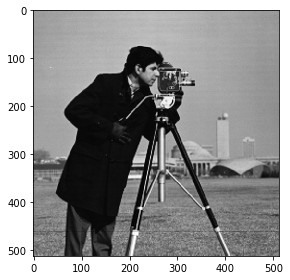

In [12]:
io.imshow(camera)
io.show()

## read image by url

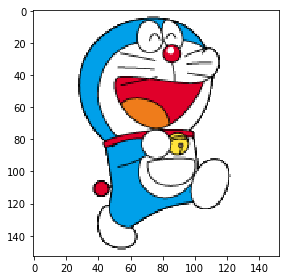

In [19]:
logo = io.imread('http://labfile.oss.aliyuncs.com/courses/370/ascii_dora.png')
io.imshow(logo)
io.show()

In [20]:
# Save image file
io.imsave('Image\local_logo.png', logo)

# 2. Data type

In [27]:
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ..., 
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [28]:
camera.dtype

dtype('uint8')

In [30]:
camera_multiply = 3 * camera  # 溢出
camera_multiply

array([[212, 215, 224, ..., 200, 200, 200],
       [212, 215, 221, ..., 200, 200, 200],
       [218, 215, 212, ..., 200, 200, 200],
       ..., 
       [107, 113, 122, ..., 107,  83,  77],
       [107, 113, 122, ..., 107,  83,  77],
       [107, 113, 122, ..., 107,  83,  77]], dtype=uint8)

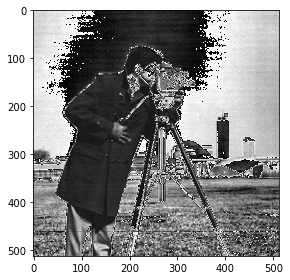

In [31]:
io.imshow(camera_multiply)
io.show()

## sobel filter

In [38]:
from skimage import filters
camera_sobel = filters.sobel(camera)
camera_sobel

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.71661950e-03,   7.90417426e-03, ...,
          1.96078431e-03,   1.96261557e-17,   0.00000000e+00],
       [  0.00000000e+00,   4.90196078e-03,   1.00937550e-02, ...,
          4.99903874e-03,   9.80392157e-04,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   2.01159652e-02,   1.19269854e-02, ...,
          5.08387928e-02,   3.05341402e-02,   0.00000000e+00],
       [  0.00000000e+00,   1.38648388e-02,   8.31890331e-03, ...,
          4.71404521e-02,   2.77296777e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [42]:
camera_sobel.min(), camera_sobel.max(), camera_sobel.mean(), camera_sobel.std()

(0.0, 0.5915023652179584, 0.032911145470406328, 0.060008128090134109)

# 3. Colors space

In [46]:
from skimage import data

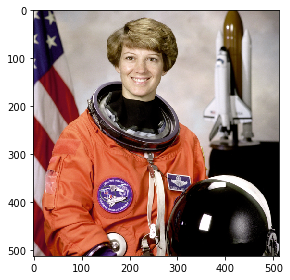

In [53]:
image = data.astronaut()
io.imshow(image)
io.show()

In [54]:
image.shape

(512, 512, 3)

In [55]:
from skimage import color

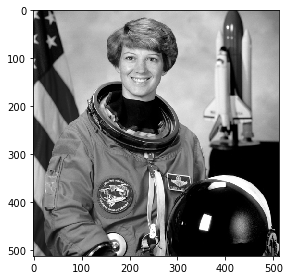

In [60]:
image_gray = color.rgb2gray(image)
io.imshow(image_gray)
io.show()

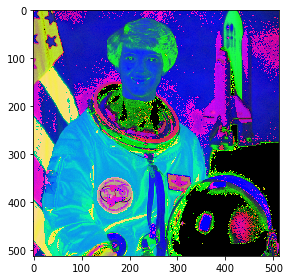

In [62]:
image_hsv = color.rgb2hsv(image)
io.imshow(image_hsv)
io.show()

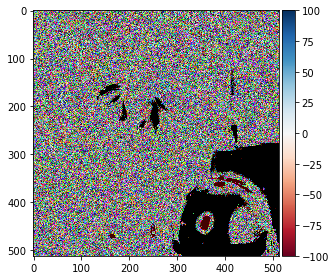

In [63]:
image_lab = color.rgb2lab(image)
io.imshow(image_lab)
io.show()

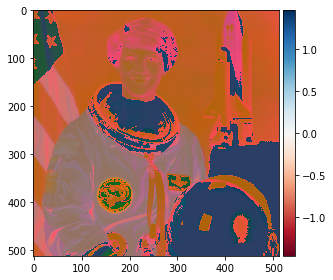

In [64]:
image_hed = color.rgb2hed(image)
io.imshow(image_hed)
io.show()

# 4. Image coordinate

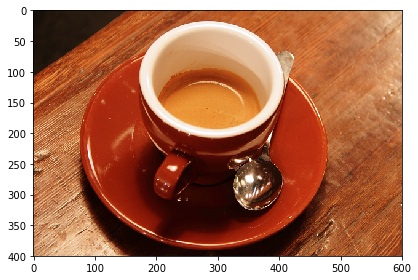

In [66]:
image = data.coffee()
io.imshow(image)
io.show()

In [76]:
image.shape

(400, 600, 3)

In [77]:
image[0].shape

(600, 3)

In [78]:
image[0,0].shape

(3,)

In [80]:
image[0,0,0], image[0,0,1], image[0,0,2]

(21, 13, 8)

# 5. Geometrical transform

In [81]:
import math
import skimage.transform as tf

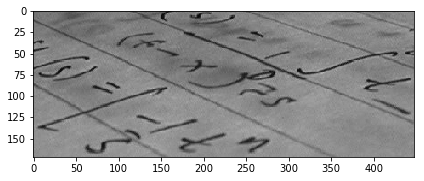

In [82]:
text = data.text()
io.imshow(text)
io.show()

In [83]:
tform = tf.SimilarityTransform(scale = 1, rotation = math.pi/4, translation = (text.shape[0]/2, -100))

In [84]:
rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

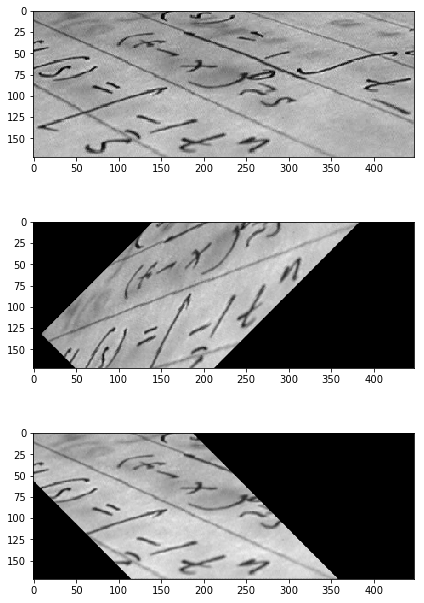

In [96]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (6,9))
plt.gray()
ax1.imshow(text)
#ax1.axis('off')
ax2.imshow(rotated)
#ax2.axis('off')
ax3.imshow(back_rotated)
#ax3.axis('off')
plt.tight_layout()
plt.show()

# 6. Image process

## local filter

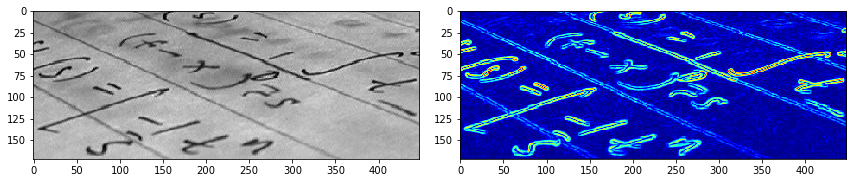

In [9]:
from skimage import data, filters
import matplotlib.pyplot as plt

text = data.text()
hsobel_text = filters.sobel(text)

plt.figure(figsize = (12,3))

plt.subplot(121)
plt.imshow(text, cmap = 'gray', interpolation = 'nearest')
# plt.axis('off')

plt.subplot(122)
plt.imshow(hsobel_text, cmap = 'jet', interpolation = 'nearest')
# plt.axis('off')

plt.tight_layout()
plt.show()

## nonlocal filter

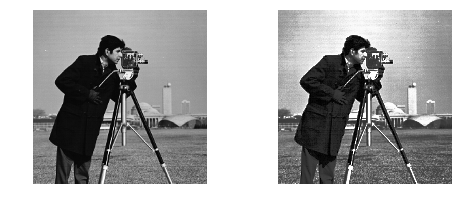

In [14]:
from skimage import data, exposure
import matplotlib.pyplot as plt

camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)

plt.figure(figsize = (7,3))

plt.subplot(121)
plt.imshow(camera, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')

plt.subplot(122)
plt.imshow(camera_equalized, cmap = 'gray', interpolation = 'nearest')
plt.axis('off')

plt.tight_layout()
plt.show()

# 7. Image segmentation

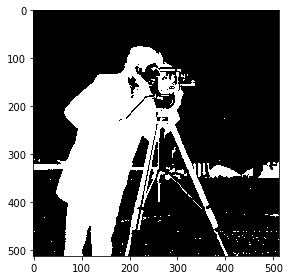

In [20]:
from skimage import data, filters, io

camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val
io.imshow(mask)
io.show()

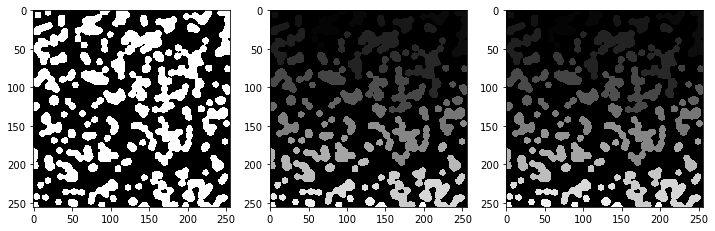

In [53]:
import numpy as np
# from skimage.morphology import label
n = 20
l = 256
im = np.zeros((l, l))
points = l * np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma = l/(4.*n))
blobs = im > im.mean()

# 对联通的部分加标签
all_labels = skimage.morphology.label(blobs)
# 去掉背景的部分，不为背景加标签
blobs_labels =skimage.morphology.label(blobs, background = 0)

plt.figure(figsize = (12,5))

plt.subplot(131)
plt.imshow(blobs, cmap = 'gray', interpolation = 'nearest')
# plt.axis('off')

plt.subplot(132)
plt.imshow(all_labels, cmap = 'gray', interpolation = 'nearest')
# plt.axis('off')

plt.subplot(133)
plt.imshow(blobs_labels, cmap = 'gray', interpolation = 'nearest')
# plt.axis('off')

#plt.tight_layout()
plt.show()

In [47]:
all_labels.shape

(256, 256)

# 8. Feature extraction

## Harris

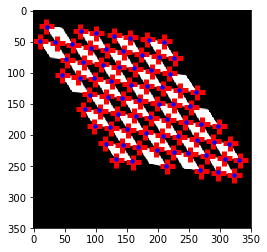

In [55]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

tform = AffineTransform(scale = (1.3, 1.1), rotation = 1, shear = 0.7, translation = (210,50))
image = warp(data.checkerboard(), tform.inverse, output_shape = (350,350))

coords = corner_peaks(corner_harris(image), min_distance = 5)
coords_subpix = corner_subpix(image, coords, window_size = 13)

plt.gray()
plt.imshow(image, interpolation = 'nearest')
plt.plot(coords_subpix[:,1], coords_subpix[:,0], '+r', markersize = 15, mew = 5)

plt.plot(coords[:,1], coords[:,0], '.b', markersize = 7)
# plt.axis('off')
plt.show()